In [5]:
import pandas as pd
from pathlib import Path
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
from ezekial import yahooprophet as yfp

# %matplotlib inline

In [6]:
ticker_file_path = Path('data/S&P500 tickers.csv')
ticker_df = pd.read_csv(ticker_file_path)
prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()

prophet_ticker_list[0]

'AAPL'

In [25]:
# for ticker in prophet_ticker_list:
#     print(ticker)

In [29]:
#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 2018
# for x in range(len(prophet_ticker_list)):
#     print(x)
    # try:
    #     if x == 0:
    #         df = yf.Ticker(prophet_ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])    
    #     else:
    #         df1 = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])
    #         df = pd.concat([df, df1], axis=1)
    # except: print("yfinance api public ip calls reached daily limit.\nConsider using torify command &/or Alpha Vantage API")

In [7]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.50591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2506.88      0.012411       1806.49     0.07985      0.6148      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2563.15    0.00602647       429.704       0.557       0.557      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2584.16    0.00382398       1831.82     0.07455           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2594.78    0.00577079       649.638           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     482       2599.84   0.000153763       317.922   9.166e-07       0.001      615  LS failed, Hessian reset 
     499        2601.2    0.00741907    

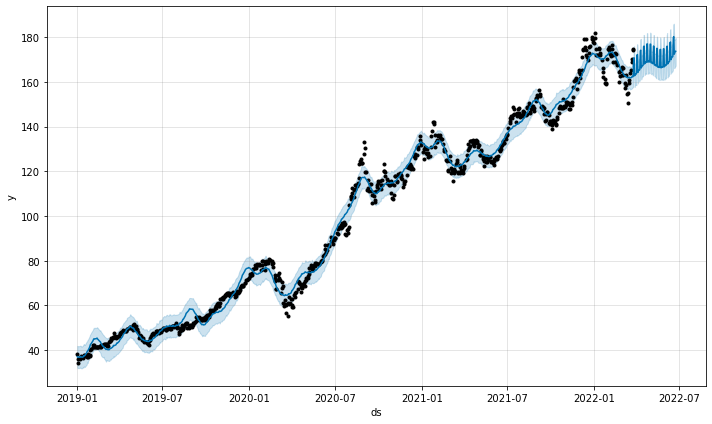

In [8]:
prophet_plot = yfp_obj.plot()

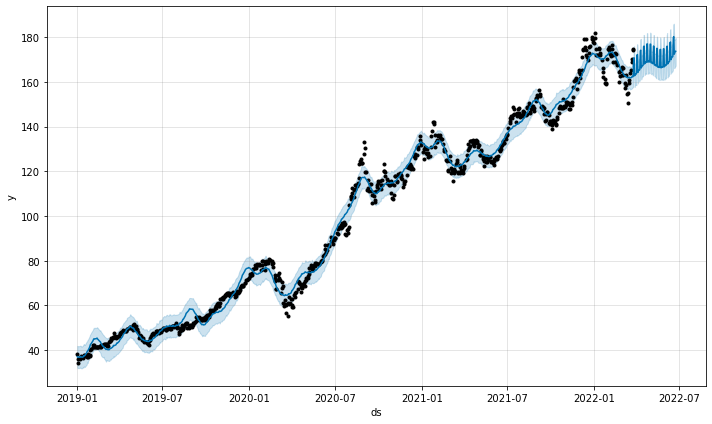

In [9]:
prophet_plot

# Byte Encoding Matplotlib Figure to byte string and decoding it

## Server Side (Put in Function in Ezekial Itself):
Look for more effecient method to rather than saving prior to converting to byte string.

In [10]:
# Have to convert from matplotlib figure to .png
forecast_img_path = Path('images/forecast_temp/forecast.png')
prophet_plot.savefig(forecast_img_path)

In [11]:
# Create the converted image to string
import base64

with open(forecast_img_path, "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(len(converted_string))
# print(converted_string.decode('utf-8'))

# Save converted string to .bin file
# USE POST METHOD ON THE API INSTEAD
forecast_img_path = Path('images/forecast_temp/encoded.bin')
with open(forecast_img_path, "wb") as file:
    file.write(converted_string)

71076


## Client Side (app side)

In [86]:
import base64
# USE API CALL HERE FIRST 
# MAY NEED TO SAVE FIRST FOR READING IN BINARY MODE & SETTING AS A VAR
forecast_img_path = Path('images/forecast_temp/encoded.bin')
file = open(forecast_img_path, 'rb')
byte = file.read()
file.close()
# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode((byte)))
decodeit.close()

In [ ]:
#load decoded image into Kivy

## Checking Ezekial Method

In [3]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.50591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2521.31       0.14254       2276.35           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2572.3     0.0120803        256.26       0.678           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2588.9    0.00140161       536.075           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       2593.63   0.000110521        159.26   1.758e-07       0.001      472  LS failed, Hessian reset 
     399       2595.56    0.00066646       206.927      0.5699      0.5699      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       2600.54   0.000281555    

Successfully saved AAPL image.


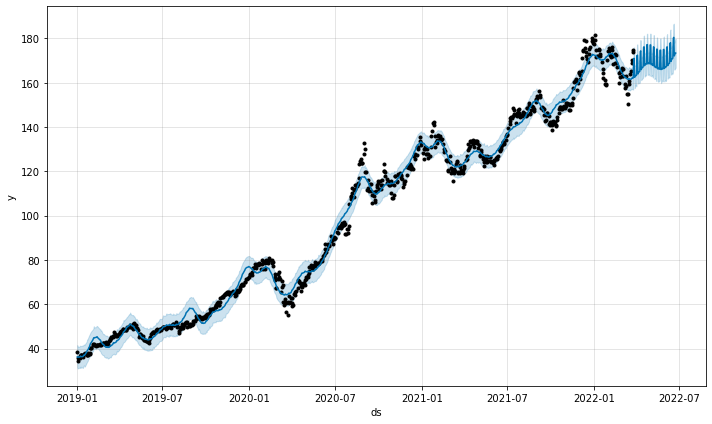

In [4]:
yfp_obj.encode_plot()

In [7]:
yfp_obj.decode_plot()
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

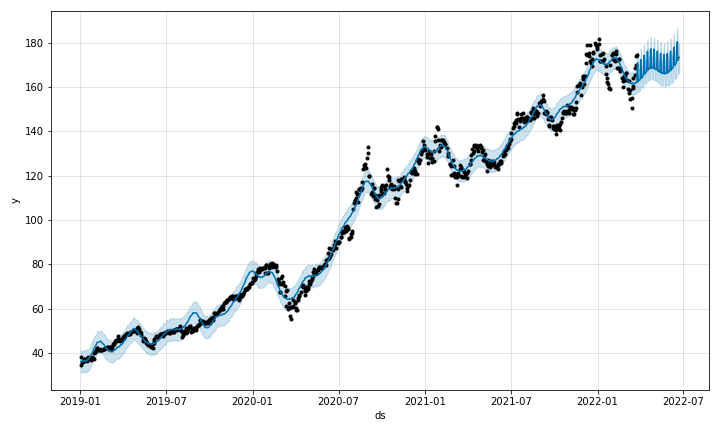

In [8]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 

# Make Function to Use Ezekial for the Entire Ticker List and Upload Images with POST to Django Server

### Checking Djanjo Requests

In [1]:
import requests

In [40]:
url = 'http://YOUR_IP/ds/'

In [41]:
response = requests.get(url)
response_json = response.json()
response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'},
 {'id': 2, 'ticker': 'appl', 'encoded_string': 'asdfasdfasdf'}]

In [24]:
# convert to dictionary
response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'}]

### Checking Django POST

In [85]:
forecast_img_path = Path('images/forecast_temp/encoded.bin')
with open(forecast_img_path, "r") as file:
    encoded_image = str(file.readlines()).replace('[','').replace(']','')

len(encoded_image[1:])

71077

In [76]:
url = 'http://YOUR_IP/ds/'

In [89]:
json_post = {
    "ticker": f"{prophet_ticker_list[3]}",
    "encoded_string": f"{encoded_image[1:]}"
}

len(json_post['encoded_string'])

71077

In [90]:
requests.post(url,json_post)

<Response [400]>

In [88]:
response = requests.get(url)
response_json = response.json()
response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'},
 {'id': 2, 'ticker': 'appl', 'encoded_string': 'asdfasdfasdf'}]

In [ ]:
# class BCS_API:
#     """Class that accepts BCS User Login (email address)
#         and Password. https://bootcampspot.com/"""
    
#     def __init__(self, username, password, coursenum):
#         self.username = username
#         self.password = password
#         self.coursenum = int(coursenum)

#         url = 'https://bootcampspot.com/api/instructor/v1/login'
#         data = {
#         "email": "{}".format(self.username),
#         "password": "{}".format(self.password)}
#         headers = {"Content-Type": "application/json; charset=utf-8"}
#         response = requests.post(url, headers=headers, json=data)
#         response_json = response.json()
#         response_json = response_json['authenticationInfo']
#         # df = pd.DataFrame(response_json, index=range(0,index))
#         df = pd.DataFrame(response_json, index=range(0,1))
#         # return df

#         # def authToken():
#         """Accepts DF from `bcs_login` and returns dictionary header to be used with requests module."""
#         col_list = []
#         for x in df.columns:
#             col_list.append(x)
#         col_list = col_list[-1]
#         # input_df['authToken']
#         token = '\'{}\': \'{}\''.format(col_list, response_json['authToken'])
#         content_header = '"Content-Type": "application/json; charset=utf-8"'
#         headers = "{{{}, {}}}".format(content_header, token)
#         headers = eval(headers)